In [101]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"


def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()


In [104]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()

<AxesSubplot:>

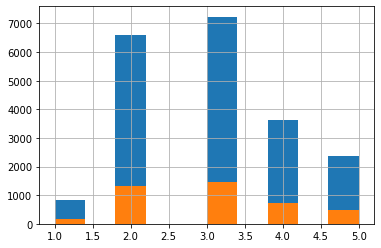

In [111]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit


housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

strat_test_set["income_cat"].hist()

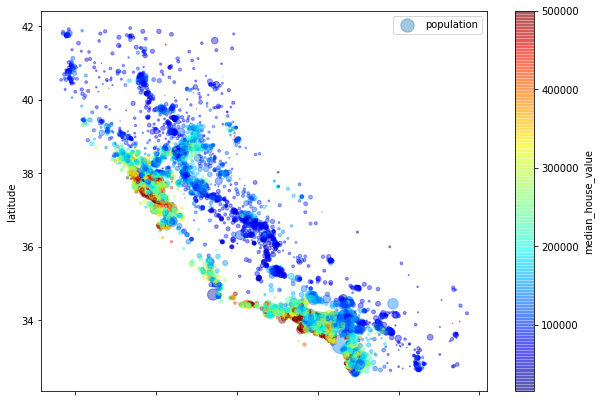

In [33]:
housing = strat_train_set.copy()
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"] / 100, label="population",
             figsize=(10, 7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [112]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

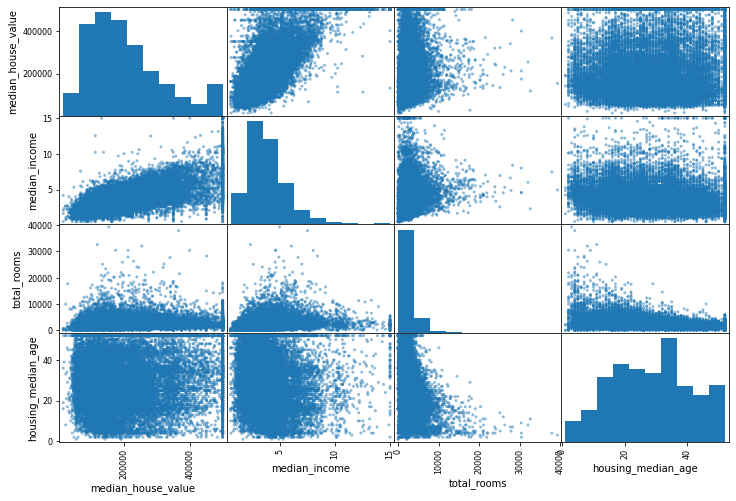

In [113]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12, 8))

In [149]:
important_cols = corr_matrix["median_house_value"].nlargest(4).keys().to_list()[1:]
important_indices = [housing.columns.get_loc(col) for col in important_cols]
important_indices

[7, 3, 2]

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

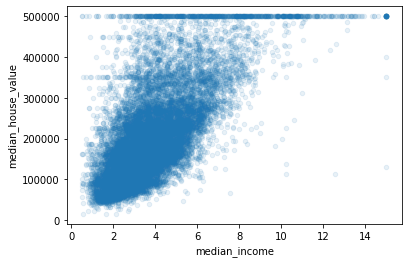

In [37]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [38]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='rooms_per_household', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='bedrooms_per_room', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='population_per_household', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='rooms_per_household', ylabel='median_income'>,
        <AxesSubplot:xlabel='bedrooms_per_room', ylabel='median_income'>,
        <AxesSubplot:xlabel='population_per_household', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='rooms_pe

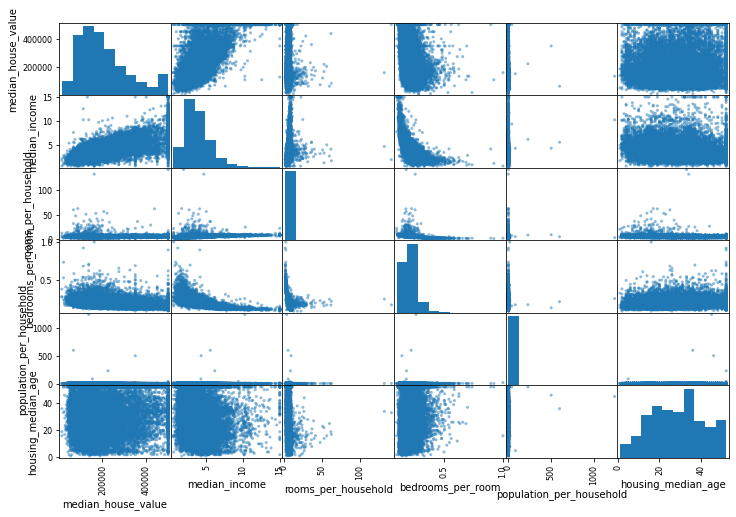

In [41]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "rooms_per_household", "bedrooms_per_room", "population_per_household", "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12, 8))

In [204]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [43]:
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

In [51]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
# imputer.fit(housing_num)

# imputer.statistics_
# housing_num.median().values

X = imputer.fit_transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [52]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [56]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [57]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [59]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6


class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

from sklearn.compose import ColumnTransformer

num_attributes = list(housing_num)
cat_attributes = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attributes),
    ('cat', OneHotEncoder(), cat_attributes)
])

housing_prepared = full_pipeline.fit_transform(housing)

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [63]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print('Predictions:', lin_reg.predict(some_data_prepared))

Predictions: [203682.37379543 326371.39370781 204218.64588245  58685.4770482
 194213.06443039]


In [64]:
print('Labels:', list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [65]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

68376.64295459937


In [67]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [71]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())

display_scores(tree_rmse_scores)

Scores: [68887.6341886  65935.37472311 70457.54364756 69349.78143977
 71111.44590704 74610.64255667 71120.16890188 70320.31226338
 76962.55547451 70150.80175392]
Mean: 70890.62608564226
Standard deviation: 2877.6579621308447


In [72]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66877.52325028 66608.120256   70575.91118868 74179.94799352
 67683.32205678 71103.16843468 64782.65896552 67711.29940352
 71080.40484136 67687.6384546 ]
Mean: 68828.99948449328
Standard deviation: 2662.76157061034


In [75]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
# random_forest.fit(housing_prepared, housing_labels)
# random_forest_predictions = random_forest.predict(housing_prepared)
# random_forest_mse = mean_squared_error(housing_labels, random_forest_predictions)
# random_forest_rmse = np.sqrt(random_forest_mse)
# print(random_forest_rmse)

random_forest_scores = cross_val_score(random_forest, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
random_forest_rmse_scores = np.sqrt(-random_forest_scores)
display_scores(random_forest_rmse_scores)

Scores: [49029.20513058 47351.73603669 49724.52728489 52165.98972269
 49249.81688489 53424.56424352 48806.75194372 48091.08706882
 53481.53269498 50179.98557809]
Mean: 50150.51965888558
Standard deviation: 2049.5913958079227


In [76]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]},
]

forest_req = RandomForestRegressor()

grid_search = GridSearchCV(forest_req, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)
grid_search.best_params_
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [77]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

63894.11667945749 {'max_features': 2, 'n_estimators': 3}
55475.37774837513 {'max_features': 2, 'n_estimators': 10}
53106.92033478276 {'max_features': 2, 'n_estimators': 30}
61852.20163665023 {'max_features': 4, 'n_estimators': 3}
53368.37239760989 {'max_features': 4, 'n_estimators': 10}
51303.19440063042 {'max_features': 4, 'n_estimators': 30}
60315.31955284439 {'max_features': 6, 'n_estimators': 3}
52952.81343327032 {'max_features': 6, 'n_estimators': 10}
50951.56417201376 {'max_features': 6, 'n_estimators': 30}
59087.633373915734 {'max_features': 8, 'n_estimators': 3}
52502.505529139875 {'max_features': 8, 'n_estimators': 10}
50980.560180880915 {'max_features': 8, 'n_estimators': 30}
61688.876296905466 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
55188.19746382696 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60177.83645427436 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53340.465984752365 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [85]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distributions = {'n_estimators': randint(1, 60), 'max_features': randint(2, 16)}

random_search = RandomizedSearchCV(forest_req, n_iter=30, param_distributions=param_distributions, scoring='neg_mean_squared_error', return_train_score=True, cv=5)
random_search.fit(housing_prepared, housing_labels)
random_search.best_params_
np.sqrt(-random_search.best_score_)

50331.03136654958

In [92]:
feature_importances = random_search.best_estimator_.feature_importances_
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attributes + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.36098564581962606, 'median_income'),
 (0.14104066323437772, 'INLAND'),
 (0.11266870939195317, 'pop_per_hhold'),
 (0.07905906384409724, 'income_cat'),
 (0.06218134237429026, 'longitude'),
 (0.058209237613767235, 'latitude'),
 (0.046423141607302015, 'housing_median_age'),
 (0.03815270776924364, 'bedrooms_per_room'),
 (0.03431215512634726, 'rooms_per_hhold'),
 (0.014476647131886448, 'total_rooms'),
 (0.014287125977868662, 'population'),
 (0.014202763029369535, 'total_bedrooms'),
 (0.013946580269191097, 'households'),
 (0.005776236571107427, '<1H OCEAN'),
 (0.0027508509590736404, 'NEAR OCEAN'),
 (0.001447018248185087, 'NEAR BAY'),
 (8.011103231343943e-05, 'ISLAND')]

In [95]:
final_model = random_search.best_estimator_
X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

48047.43731965917

In [96]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([46058.89254332, 49956.89025206])

In [97]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=1, gamma='scale')
svr_scores = cross_val_score(svr, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
svr_rmse = np.sqrt(-svr_scores)
display_scores(svr_rmse)

Scores: [111278.19965683 119407.30459841 116854.19841062 120327.97864229
 117498.68029855 122169.71157035 117531.7045561  121375.69566777
 120246.96373235 117894.32343717]
Mean: 118458.47605704253
Standard deviation: 2934.380691324086


In [100]:
params_distribution = {'kernel': ('rbf', 'linear'), 'C': randint(1,10), 'gamma': ('scale', 'auto')}
random_search = RandomizedSearchCV(SVR(), param_distributions=params_distribution, n_iter=5, scoring='neg_mean_squared_error', return_train_score=True, cv=5)
random_search.fit(housing_prepared, housing_labels)

np.sqrt(-random_search.best_score_)

115841.10777285272

In [151]:
class ImportantSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        sub_arrays = [X[:, idx] for idx in self.columns]
        return np.c_[sub_arrays]


important_cols = corr_matrix["median_house_value"].nlargest(4).keys().to_list()[1:]
important_indices = [housing.columns.get_loc(col) for col in important_cols]

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
    ('important_selector', ImportantSelector(columns=important_indices))
])


In [185]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.13633268e-02, 6.25729455e-02, 4.28600280e-02, 1.67912163e-02,
       1.74708041e-02, 1.89997505e-02, 1.74230663e-02, 2.41093000e-01,
       1.58449251e-01, 4.58766023e-02, 1.05494408e-01, 4.95667296e-02,
       4.33822495e-03, 1.50270996e-01, 1.05087847e-04, 2.78464720e-03,
       4.53991583e-03])

In [200]:
def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        indices = indices_of_top_k(self.feature_importances, self.k)
        return X[:, indices]


preparation_and_feature_selection = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, 3)),
])


In [189]:
housing_prepared_top_k_features = preparation_and_feature_selection.fit_transform(X_test)

In [190]:
housing_prepared_top_k_features[0:3]

array([[ 2.35790396,  1.8894188 ,  0.        ],
       [ 0.40451577,  0.94126407,  0.        ],
       [-0.44655585, -0.00689066,  0.        ]])

In [202]:
housing_prepared[0:3, indices_of_top_k(feature_importances, 3)]

array([[ 2.35790396,  1.8894188 ,  0.        ],
       [ 0.40451577,  0.94126407,  0.        ],
       [-0.44655585, -0.00689066,  0.        ]])

In [205]:
prepare_select_and_predict_pipeline = Pipeline([
    ('prep_and_select', preparation_and_feature_selection),
    ('svm_reg', RandomForestRegressor())
])

prepare_select_and_predict_pipeline.fit(housing, housing_labels)

Pipeline(steps=[('prep_and_select',
                 Pipeline(steps=[('preparation',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('attribs_adder',
                                                                                    CombinedAttributesAdder()),
                                                                                   ('std_scaler',
                                                                                    StandardScaler())]),
                                                                   ['longitude',
                                                                    'latitude',
                                                  

In [212]:
some_data = housing.iloc[:4]
some_label = housing_labels.iloc[:4]

print("Prediction:", prepare_select_and_predict_pipeline.predict(some_data))
print("Label:", list(some_label))

Prediction: [255921.08333333 310323.76666667 210052.          52548.        ]
Label: [286600.0, 340600.0, 196900.0, 46300.0]
